In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier



In [ ]:
from google.colab import files
uploaded_files = files.upload()
df = pd.read_csv('software_quality_dataset.csv')


Saving software_quality_dataset.csv to software_quality_dataset.csv


1.


In [ ]:
df.head(5)

,Lines_of_Code,Cyclomatic_Complexity,Num_Functions,Code_Churn,Comment_Density,Num_Bugs,Has_Unit_Tests,Code_Owner_Experience,Quality_Label
0,356.0,31,144,69.567047,0.467561,2,Yes,4,Medium
1,227.0,15,104,131.844422,0.795643,2,No,5,High
2,9674.0,47,141,118.729027,0.316839,5,No,1,High
3,6967.0,42,107,194.397155,0.971883,5,Yes,3,Low
4,7954.0,35,114,69.202293,0.559417,1,No,8,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lines_of_Code          1520 non-null   float64
 1   Cyclomatic_Complexity  1600 non-null   int64  
 2   Num_Functions          1600 non-null   int64  
 3   Code_Churn             1520 non-null   float64
 4   Comment_Density        1520 non-null   float64
 5   Num_Bugs               1600 non-null   int64  
 6   Has_Unit_Tests         1600 non-null   object 
 7   Code_Owner_Experience  1600 non-null   int64  
 8   Quality_Label          1600 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 112.6+ KB


In [ ]:
print(df.shape)

(1600, 9)


In [ ]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
numerical_features = numerical_data.columns.tolist()
print(f'\nThere are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

categorical_data = df.select_dtypes(include=['object'])
categorical_features = categorical_data.columns.tolist()
print(f'\nThere are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)


There are 7 numerical features: 

['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions', 'Code_Churn', 'Comment_Density', 'Num_Bugs', 'Code_Owner_Experience']

There are 2 categorical features: 

['Has_Unit_Tests', 'Quality_Label']


In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lines_of_Code,1520.0,4939.269737,2867.248259,106.000000,2490.750000,4860.000000,7455.250000,9998.000000
Cyclomatic_Complexity,1600.0,25.076875,13.879621,1.000000,13.000000,25.000000,37.000000,49.000000
Num_Functions,1600.0,103.178125,55.503710,5.000000,56.000000,104.000000,152.000000,199.000000
Code_Churn,1520.0,102.572291,50.546329,-64.283310,67.509852,104.007452,138.619113,295.139936
Comment_Density,1520.0,0.549370,0.256137,0.101037,0.337596,0.542108,0.765766,0.999976
Num_Bugs,1600.0,2.934375,1.715928,0.000000,2.000000,3.000000,4.000000,10.000000
Code_Owner_Experience,1600.0,5.045000,2.559701,1.000000,3.000000,5.000000,7.000000,9.000000



Variance of numerical features:
Lines_of_Code            8.221113e+06
Cyclomatic_Complexity    1.926439e+02
Num_Functions            3.080662e+03
Code_Churn               2.554931e+03
Comment_Density          6.560604e-02
Num_Bugs                 2.944409e+00
Code_Owner_Experience    6.552070e+00
dtype: float64

Skewness of numerical features:
Lines_of_Code            0.055175
Cyclomatic_Complexity    0.015461
Num_Functions           -0.034194
Code_Churn              -0.113186
Comment_Density          0.004302
Num_Bugs                 0.667812
Code_Owner_Experience   -0.042283
dtype: float64


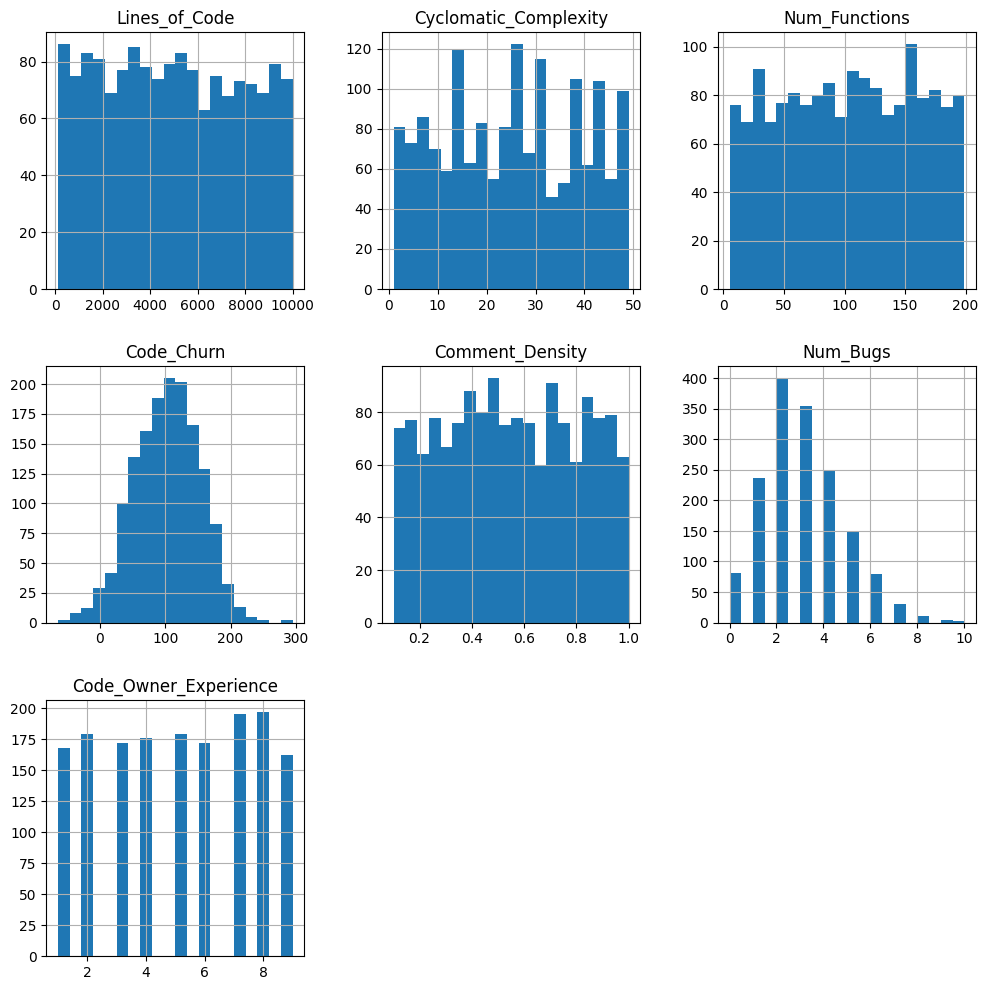

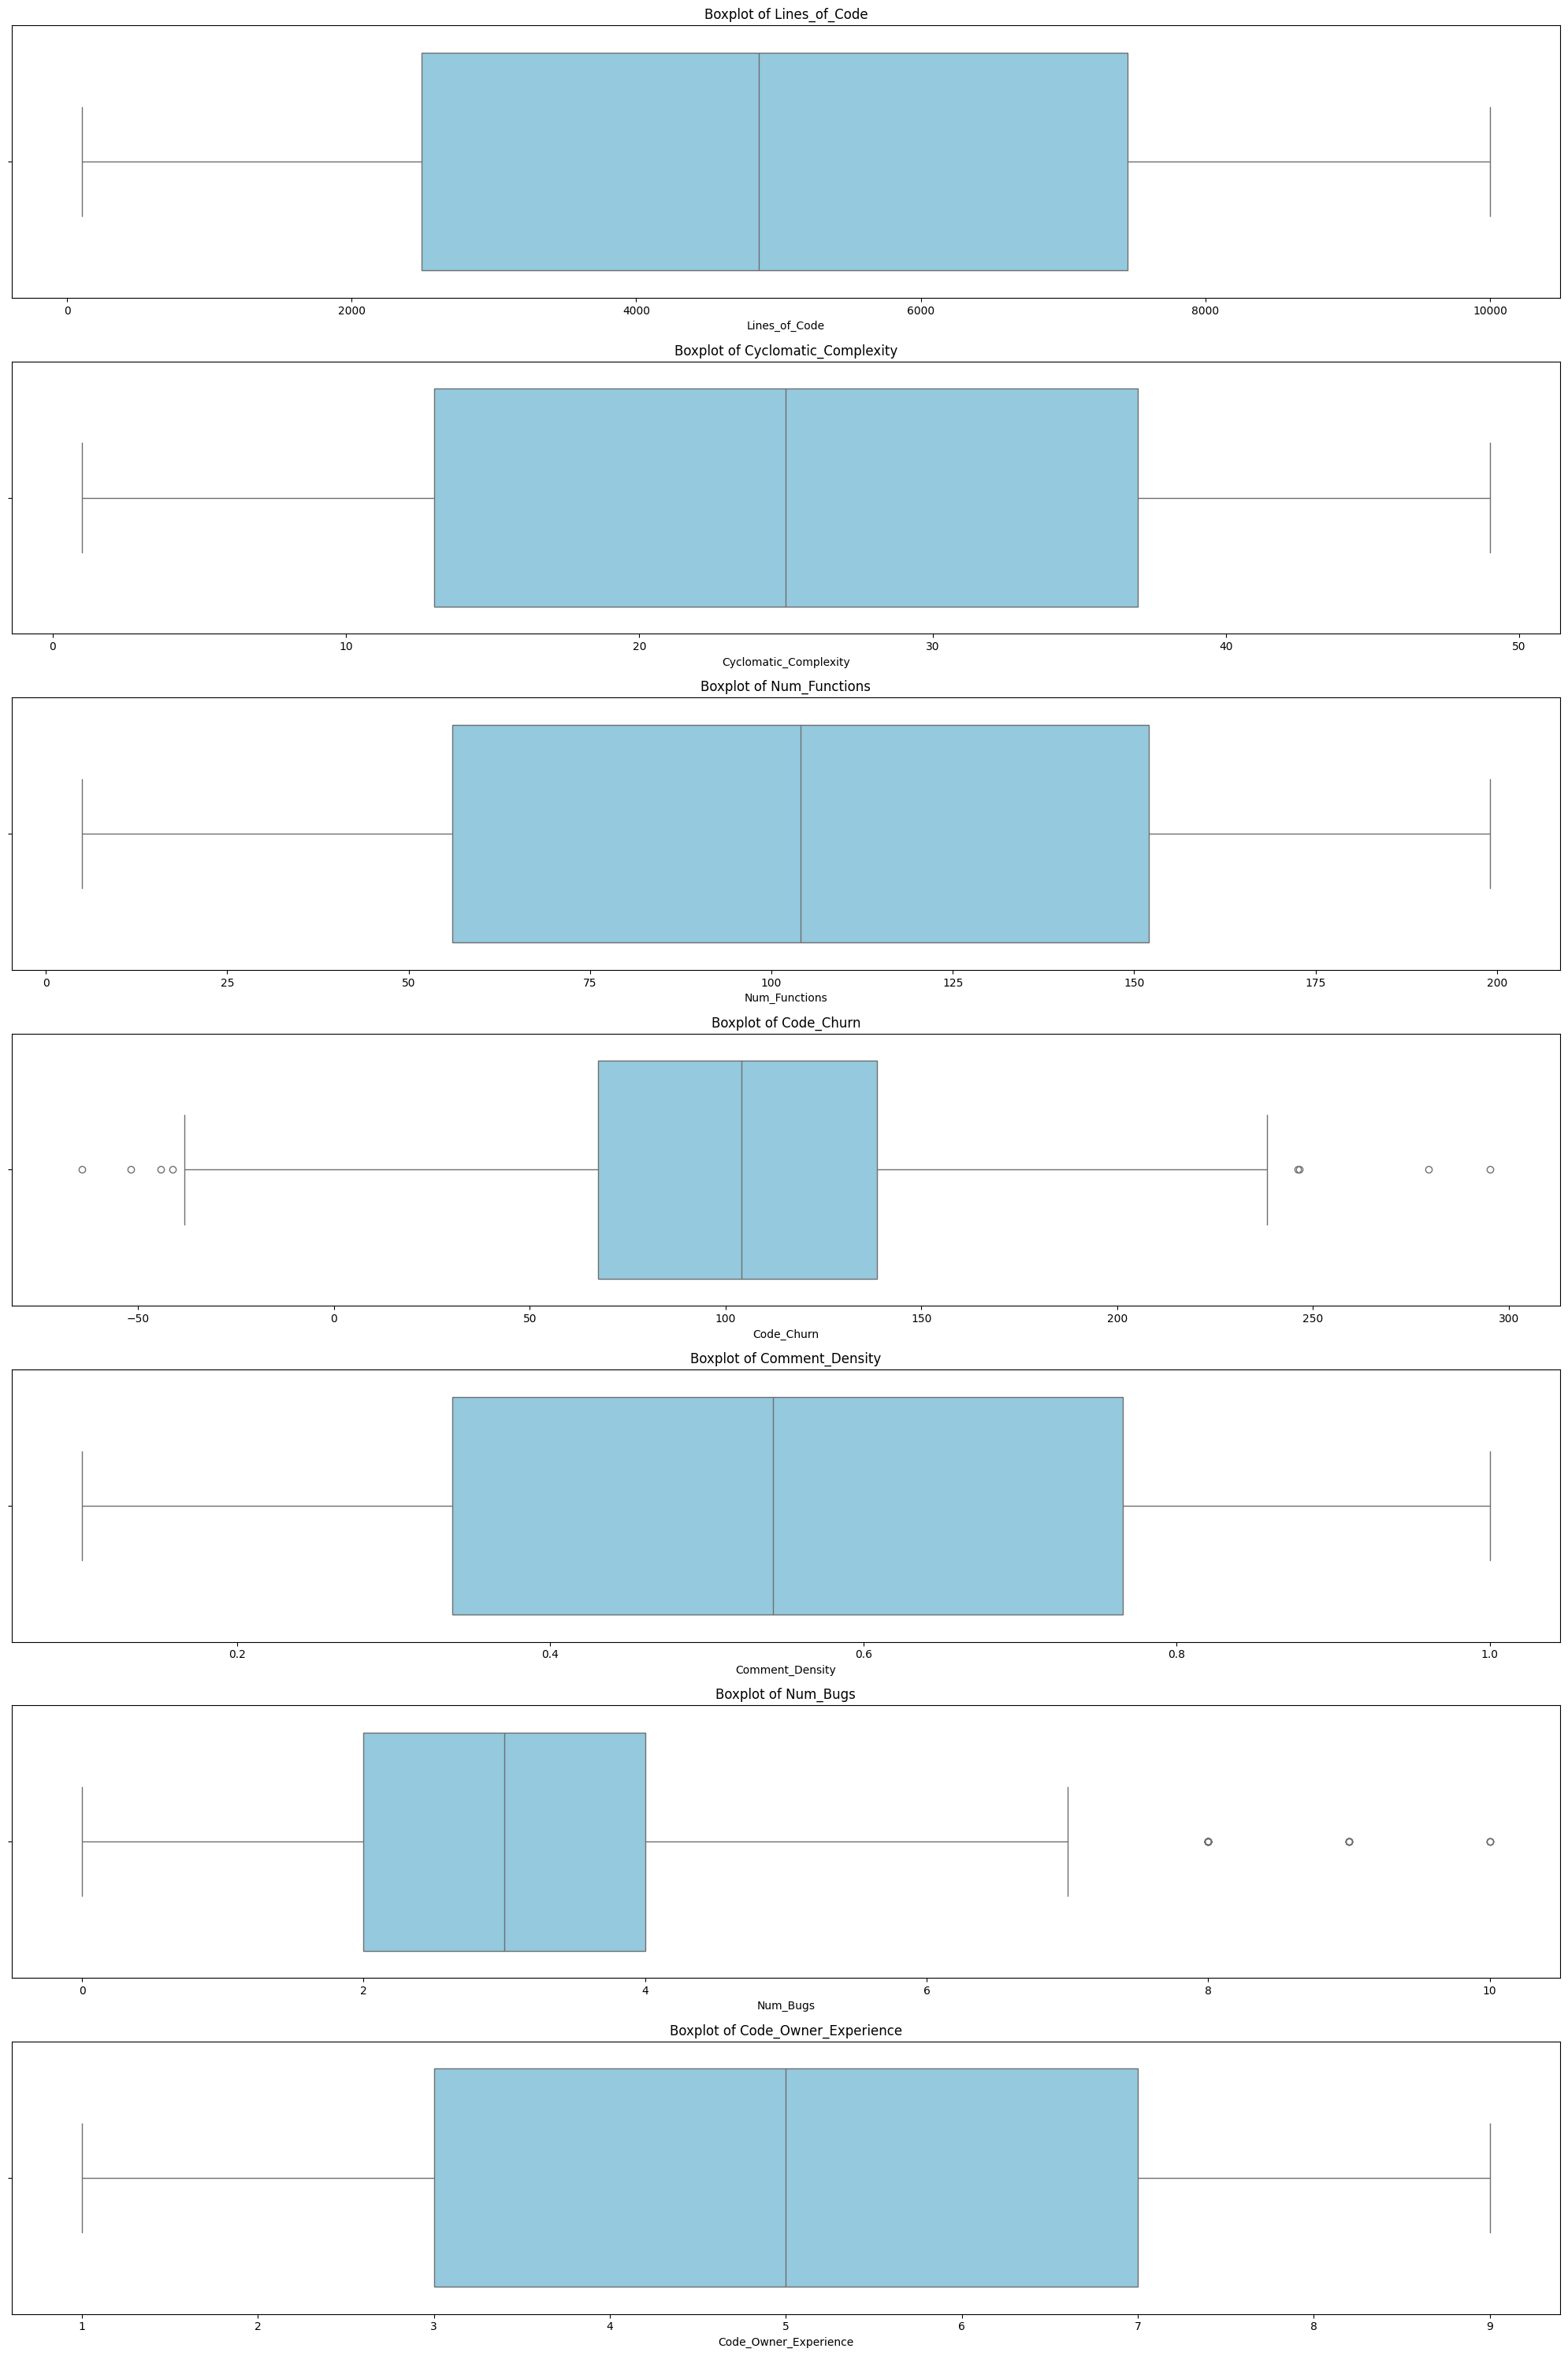


Number of unique values in numerical features:
Lines_of_Code            1413
Cyclomatic_Complexity      49
Num_Functions             195
Code_Churn               1520
Comment_Density          1520
Num_Bugs                   11
Code_Owner_Experience       9
dtype: int64

Number of unique values in categorical features:
Has_Unit_Tests    2
Quality_Label     3
dtype: int64


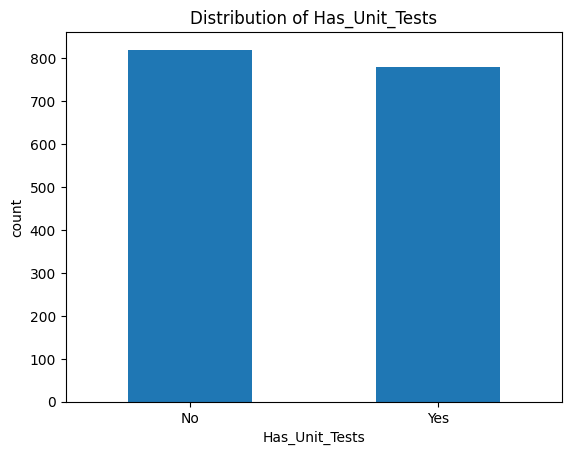

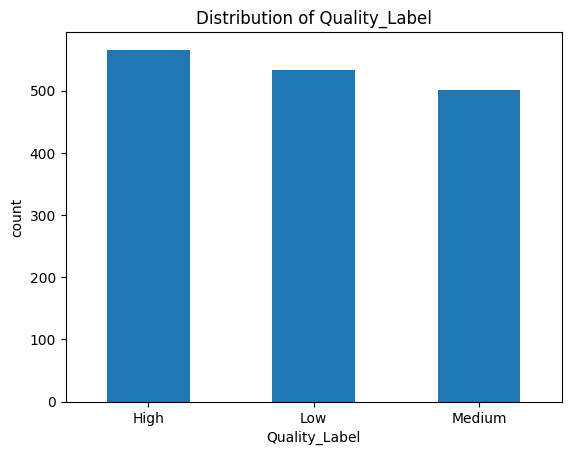

In [ ]:
#Variance of numerical features
print("\nVariance of numerical features:")
print(numerical_data.var())

#Skewness of numerical features
print("\nSkewness of numerical features:")
print(numerical_data.skew())

#Histograms for numerical features
numerical_data.hist(figsize=(12, 12), bins=20)
plt.show()

#Box plots for numerical features
plt.figure(figsize=(20, 30))
numeric_cols = numerical_data.columns
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()
plt.show()

#Number of unique values in numerical features
print("\nNumber of unique values in numerical features:")
print(numerical_data.nunique())

#Number of unique values in categorical features
print("\nNumber of unique values in categorical features:")
unique_counts = categorical_data.nunique()
print(unique_counts)

#Bar plots for categorical features
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col, ylabel='count')
    plt.show()

In [ ]:
categorical_data.describe().T

,count,unique,top,freq
Has_Unit_Tests,1600,2,No,820
Quality_Label,1600,3,High,566



Correlation matrix of numerical features:
                       Lines_of_Code  Cyclomatic_Complexity  Num_Functions  \
Lines_of_Code               1.000000               0.046746      -0.026398   
Cyclomatic_Complexity       0.046746               1.000000      -0.005937   
Num_Functions              -0.026398              -0.005937       1.000000   
Code_Churn                  0.003710              -0.022347      -0.005121   
Comment_Density             0.019014               0.041138      -0.002924   
Num_Bugs                   -0.029780              -0.076648       0.007963   
Code_Owner_Experience       0.015243              -0.019038       0.011028   
Quality_Label_Encoded       0.013405              -0.008075      -0.001412   

                       Code_Churn  Comment_Density  Num_Bugs  \
Lines_of_Code            0.003710         0.019014 -0.029780   
Cyclomatic_Complexity   -0.022347         0.041138 -0.076648   
Num_Functions           -0.005121        -0.002924  0.007963  

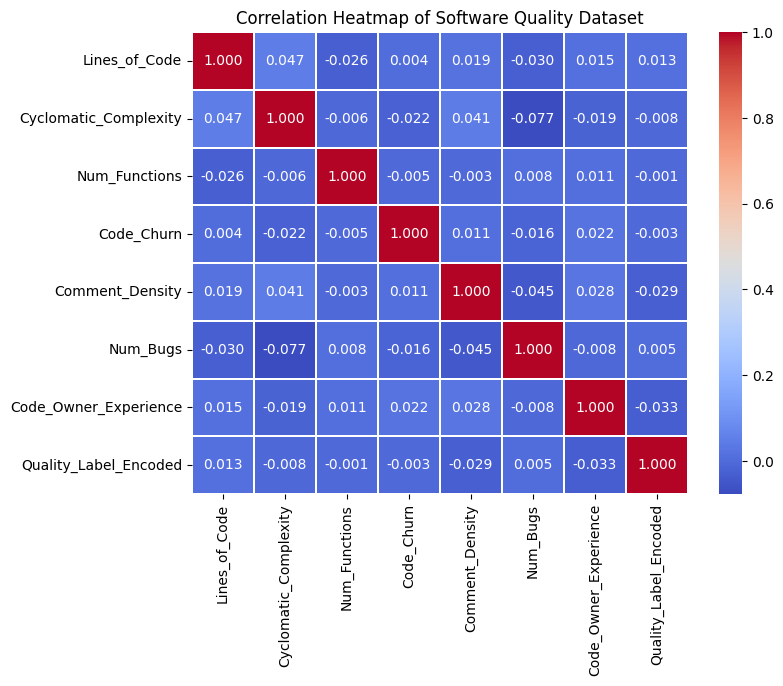

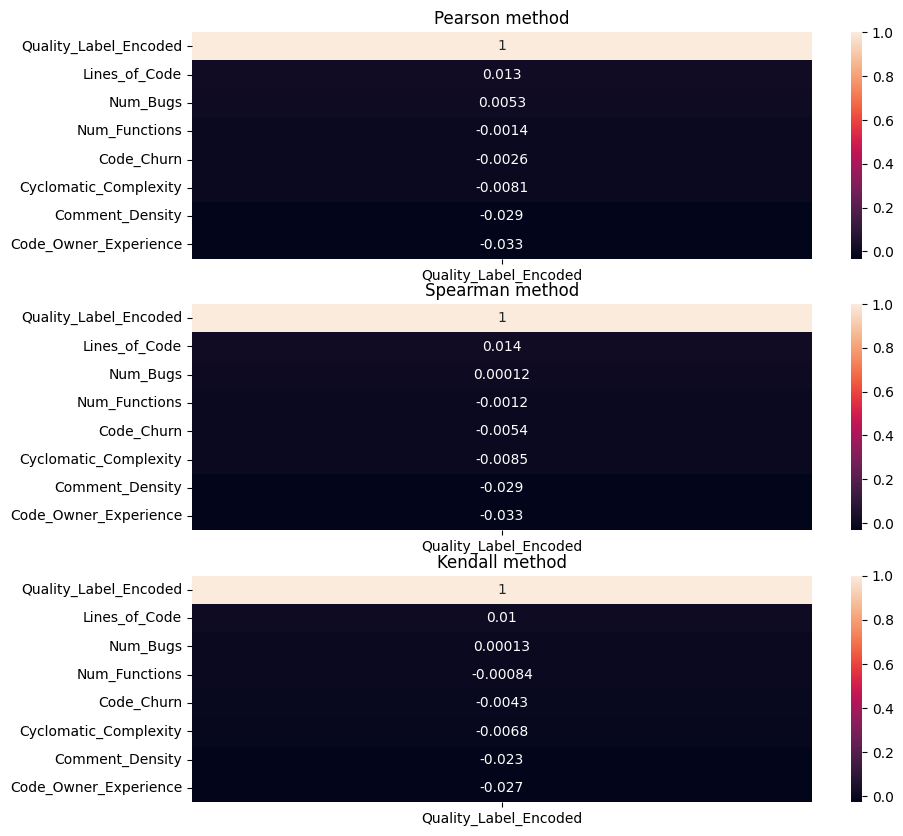

In [ ]:
#Encode Quality_Label for correlation analysis
df['Quality_Label_Encoded'] = df['Quality_Label'].map({'High': 2, 'Medium': 1, 'Low': 0})

#Update numerical data to include encoded Quality_Label
numerical_data = df.select_dtypes(include=['int64', 'float64'])

#Correlation matrix
print("\nCorrelation matrix of numerical features:")
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

#Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.title('Correlation Heatmap of Software Quality Dataset')
plt.show()

#Correlation with target (Quality_Label_Encoded) using different methods
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
corr1 = numerical_data.corr('pearson')[['Quality_Label_Encoded']].sort_values(by='Quality_Label_Encoded', ascending=False)
corr2 = numerical_data.corr('spearman')[['Quality_Label_Encoded']].sort_values(by='Quality_Label_Encoded', ascending=False)
corr3 = numerical_data.corr('kendall')[['Quality_Label_Encoded']].sort_values(by='Quality_Label_Encoded', ascending=False)

ax[0].set_title('Pearson method')
ax[1].set_title('Spearman method')
ax[2].set_title('Kendall method')

sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()


Class imbalance summary:
  quality_label  count  percentage
0          High    566        56.6
1        Medium    501        50.1
2           Low    533        53.3


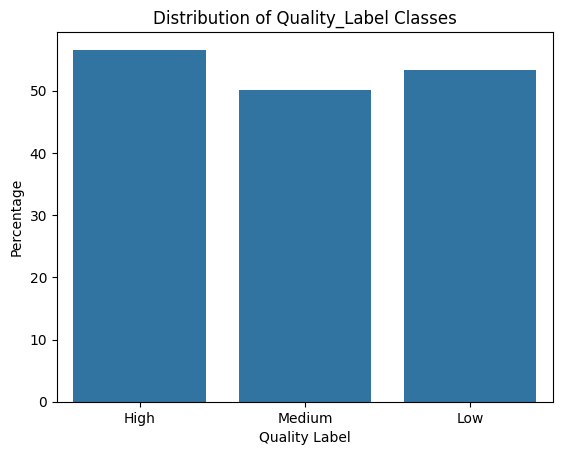

In [ ]:
#IMBALANCE
#Check imbalance in Quality_Label
class_counts = df.groupby("Quality_Label").size()

columns = ['quality_label', 'count', 'percentage']
quality_labels = ['High', 'Medium', 'Low']
count = []
percentage = []

#Calculate counts and percentages
for val in quality_labels:
    count.append(class_counts[val])
    percent = (class_counts[val] / 1000) * 100
    percentage.append(percent)

#Create DataFrame
imbalance_df = pd.DataFrame(list(zip(quality_labels, count, percentage)), columns=columns)
print("\nClass imbalance summary:")
print(imbalance_df)

#Bar plot of Quality_Label vs Percentage
sns.barplot(data=imbalance_df, x=imbalance_df['quality_label'], y=imbalance_df['percentage'])
plt.title('Distribution of Quality_Label Classes')
plt.xlabel('Quality Label')
plt.ylabel('Percentage')
plt.show()


There is imbalance between distribution of quality label classes.

In [ ]:
#imputing
#Check missing values
print("Number of missing values per column:\n", df.isnull().sum())

#Select numeric columns for imputation
numeric_cols = ['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions',
                'Code_Churn', 'Comment_Density', 'Num_Bugs', 'Code_Owner_Experience']

#Initialize SimpleImputer with mean strategy
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

#Fit and transform numeric columns
df[numeric_cols] = impute.fit_transform(df[numeric_cols])

#Verify no missing values remain
print("\nNumber of missing values after imputation:\n", df.isnull().sum())

Number of missing values per column:
 Lines_of_Code            80
Cyclomatic_Complexity     0
Num_Functions             0
Code_Churn               80
Comment_Density          80
Num_Bugs                  0
Has_Unit_Tests            0
Code_Owner_Experience     0
Quality_Label             0
Quality_Label_Encoded     0
dtype: int64

Number of missing values after imputation:
 Lines_of_Code            0
Cyclomatic_Complexity    0
Num_Functions            0
Code_Churn               0
Comment_Density          0
Num_Bugs                 0
Has_Unit_Tests           0
Code_Owner_Experience    0
Quality_Label            0
Quality_Label_Encoded    0
dtype: int64


In [ ]:
#Encoding
#Encode Has_Unit_Tests
df['Has_Unit_Tests'] = df['Has_Unit_Tests'].map({'Yes': 1, 'No': 0})

#Encode Quality_Label
df['Quality_Label'] = df['Quality_Label'].map({'High': 2, 'Medium': 1, 'Low': 0})

#Verify encoding
print("\nUnique values in Has_Unit_Tests:", df['Has_Unit_Tests'].unique())
print("Unique values in Quality_Label:", df['Quality_Label'].unique())



Unique values in Has_Unit_Tests: [1 0]
Unique values in Quality_Label: [1 2 0]


In [ ]:
#Scaling
#Select numeric features for scaling
features_to_scale = ['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions', 'Code_Churn', 'Comment_Density', 'Num_Bugs', 'Code_Owner_Experience']

#Initialize StandardScaler
scaler = StandardScaler()

#Fit and transform features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

#Verify scaling
print("\nPer-feature minimum after scaling:\n", df[features_to_scale].min())
print("Per-feature maximum after scaling:\n", df[features_to_scale].max())


Per-feature minimum after scaling:
 Lines_of_Code           -1.730043
Cyclomatic_Complexity   -1.735235
Num_Functions           -1.769410
Code_Churn              -3.387913
Comment_Density         -1.796429
Num_Bugs                -1.710615
Code_Owner_Experience   -1.580757
dtype: float64
Per-feature maximum after scaling:
 Lines_of_Code            1.810745
Cyclomatic_Complexity    1.724154
Num_Functions            1.726945
Code_Churn               3.909982
Comment_Density          1.805537
Num_Bugs                 4.118957
Code_Owner_Experience    1.545585
dtype: float64


In [ ]:
print("Missing values:", df.isnull().sum())
print("Quality_Label values:", df['Quality_Label'].unique())
print("Feature ranges:", df.describe())

Missing values: Lines_of_Code            0
Cyclomatic_Complexity    0
Num_Functions            0
Code_Churn               0
Comment_Density          0
Num_Bugs                 0
Has_Unit_Tests           0
Code_Owner_Experience    0
Quality_Label            0
Quality_Label_Encoded    0
dtype: int64
Quality_Label values: [1 2 0]
Feature ranges:        Lines_of_Code  Cyclomatic_Complexity  Num_Functions    Code_Churn  \
count   1.600000e+03           1.600000e+03   1.600000e+03  1.600000e+03   
mean   -2.264855e-16          -8.992806e-17   9.103829e-17  6.217249e-17   
std     1.000313e+00           1.000313e+00   1.000313e+00  1.000313e+00   
min    -1.730043e+00          -1.735235e+00  -1.769410e+00 -3.387913e+00   
25%    -8.276645e-01          -8.703877e-01  -8.502652e-01 -6.513321e-01   
50%    -3.255487e-16          -5.540428e-03   1.481220e-02 -2.885438e-16   
75%     8.431314e-01           8.593068e-01   8.798896e-01  6.851880e-01   
max     1.810745e+00           1.724154e+00   1

In [ ]:
#split train-test

#Define features and target
X = df[['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions','Code_Churn', 'Comment_Density', 'Num_Bugs', 'Has_Unit_Tests', 'Code_Owner_Experience']]
y = df['Quality_Label']

#Perform train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Print shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1120, 8)
Test set shape: (480, 8)


In [ ]:
#for knn
X = df[['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions','Code_Churn', 'Comment_Density', 'Num_Bugs', 'Has_Unit_Tests','Code_Owner_Experience']]
y = df['Quality_Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)

#Make predictions on test set
y_pred = knn.predict(X_test)

#Evaluate accuracy
print("Test set predictions:\n", y_pred)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set predictions:
 [1 1 1 1 0 0 0 1 0 2 1 1 1 2 0 0 1 1 0 1 1 0 2 1 1 0 0 1 0 0 0 1 0 1 0 1 2
 0 2 2 1 1 0 0 0 0 0 1 0 2 1 0 0 2 2 0 0 1 2 0 2 1 0 1 2 0 0 1 0 1 0 2 2 0
 0 1 0 0 2 2 0 0 2 0 0 2 0 1 2 1 1 0 0 2 1 1 2 1 0 0 2 1 2 1 2 2 2 2 0 0 0
 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 2 0 1 0 1 0 1 0 1 0 0 1 0 2 1 0 1 0
 0 2 2 1 2 0 1 0 2 2 0 1 0 2 0 0 1 2 0 2 2 1 0 0 1 2 0 2 0 1 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 1 1 2 2 2 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 2
 0 1 0 0 2 2 0 0 1 1 1 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 1 2 0 2 0 0 0 0 0
 0 0 0 1 1 0 2 0 2 1 1 2 0 0 0 2 0 0 1 0 1 1 1 1 0 0 0 0 2 1 2 0 0 0 2 0 0
 1 1 0 2 1 1 0 2 0 2 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 2 0 0 1 1 0 2 2 2
 0 0 0 0 1 0 1 1 0 2 1 0 2 1 0 1 1 2 2 2 0 1 0 0 2 0 2 0 2 0 0 1 0 0 2 1 1
 1 1 1 2 0 2 2 2 2 2 1 0 1 1 1 0 1 1 1 0 2 0 0 1 0 2 1 1 2 0 2 2 0 1 2 1 0
 0 1 2 1 0 0 0 0 2 1 1 1 0 2 0 0 0 2 1 0 1 1 2 1 0 0 1 0 2 0 1 1 0 0 2 1 0
 1 2 1 2 1 0 1 2 2 1 0 2 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 2 1 1 0 1 0 0]
Tes

In [ ]:
# for logistic regression
X = df[['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions','Code_Churn', 'Comment_Density', 'Num_Bugs', 'Has_Unit_Tests','Code_Owner_Experience']]
y = df['Quality_Label']

#Perform train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Initialize Logistic Regression model
lr = LogisticRegression(max_iter = 5000)

#Train the model
lr.fit(X_train, y_train)

#Make predictions on test set
y_pred = lr.predict(X_test)

#Evaluate accuracy
print("Test set predictions:\n", y_pred)
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))



Test set predictions:
 [2 0 1 1 1 0 2 2 0 1 1 1 2 2 0 0 2 1 0 1 2 0 2 1 0 0 0 0 2 0 1 1 2 2 1 2 0
 1 2 2 1 2 2 0 1 2 2 1 0 0 2 2 2 0 1 2 2 1 2 0 2 1 0 2 2 0 0 2 1 0 1 1 2 0
 0 0 2 2 2 2 2 2 2 0 1 2 2 1 0 2 2 2 0 2 1 1 2 1 2 0 1 2 1 2 0 2 0 2 0 2 0
 2 1 2 2 2 0 2 2 1 2 2 1 2 1 1 2 1 0 1 2 0 2 2 2 0 0 2 2 0 1 2 1 0 0 0 1 0
 0 2 0 2 1 2 2 2 1 2 2 1 2 1 2 2 1 2 0 2 0 1 1 1 2 0 2 0 2 0 1 2 2 1 1 1 1
 0 1 0 1 1 2 1 0 1 2 0 0 1 2 2 0 1 0 2 0 1 2 1 2 0 2 0 0 2 1 1 1 1 2 2 2 0
 0 2 1 0 1 0 0 2 1 2 2 0 2 2 2 2 0 1 2 0 0 2 1 0 2 2 2 2 2 0 2 2 2 0 1 2 2
 2 2 0 1 2 0 0 2 2 2 1 2 2 2 1 2 2 1 0 1 0 2 0 1 2 0 2 2 0 1 2 2 2 2 1 2 0
 2 2 0 2 2 1 2 1 2 2 1 0 2 1 2 2 2 1 2 1 2 1 1 2 2 2 1 2 2 2 2 2 0 2 2 2 2
 1 1 1 0 1 2 1 0 1 0 0 2 2 0 1 2 1 2 0 2 0 1 1 1 0 1 2 0 2 2 2 1 1 0 2 2 0
 2 2 1 2 1 2 2 2 2 0 2 0 2 1 2 1 0 1 2 2 1 1 2 1 2 0 2 2 1 0 1 2 0 0 2 2 2
 1 1 2 2 2 0 2 2 2 0 2 1 2 2 2 0 2 2 2 1 1 1 2 2 2 2 1 0 1 2 2 0 2 2 0 1 2
 2 2 2 0 2 2 1 0 2 2 0 2 2 2 2 2 2 0 2 1 2 0 1 1 2 0 2 0 2 2 0 0 2 0 0 2]
Tes

In [ ]:
#Neural Network

X = df[['Lines_of_Code', 'Cyclomatic_Complexity', 'Num_Functions',
             'Code_Churn', 'Comment_Density', 'Num_Bugs', 'Has_Unit_Tests',
             'Code_Owner_Experience']].values
y = df['Quality_Label'].values.reshape(-1, 1)

# Perform train-test split (70% training, 30% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Custom neural network implementation
class ReLU:
    def forwardPropagation(self, inp):
        self.inputAct = np.maximum(0, inp)
        return self.inputAct

    def backPropagation(self, delta):
        return delta * np.where(self.inputAct > 0, 1, 0)

class MeanSquareError:
    def loss(self, Y, y):
        self.Y = Y
        self.y = y
        return np.abs((Y - y) ** 2).sum() / y.shape[0]

    def deriv(self):
        return (self.Y - self.y) / self.y.shape[0]

class GradientDescent:
    def __init__(self, learningRate):
        self.learningRate = learningRate

    def gradients(self, gradients):
        return self.learningRate * gradients

class NeuronLayer:
    def __init__(self, inputNeurons, outputNeurons, activation, biasFlag=True, randomState=42):
        np.random.seed(randomState)
        self.inputNeurons = inputNeurons
        self.outputNeurons = outputNeurons
        self.biasFlag = biasFlag
        self.activation = activation()
        self.weights = np.random.uniform(-np.sqrt(2/(inputNeurons + outputNeurons)), np.sqrt(2/(inputNeurons + outputNeurons)), size=(inputNeurons, outputNeurons))
        self.bias = np.random.uniform(-np.sqrt(2/(inputNeurons + outputNeurons)), np.sqrt(2/(inputNeurons + outputNeurons)), size=(1, outputNeurons))

    def build(self, optimizer, learningRate):
        self.learningRate = learningRate
        self.optimizer = optimizer(learningRate)

    def forwardPropagation(self, X):
        self.X = X
        self.output = np.dot(self.X, self.weights) + (self.biasFlag * self.bias)
        self.output = self.activation.forwardPropagation(self.output)
        return self.output

    def backPropagation(self, upstreamGradient):
        delta = self.activation.backPropagation(upstreamGradient)
        weightGrad = np.dot(self.X.T, delta) / self.X.shape[0]
        biasGrad = np.dot(np.ones((1, self.X.shape[0])), delta) / self.X.shape[0]
        self.weights -= self.optimizer.gradients(weightGrad)
        self.bias -= self.optimizer.gradients(biasGrad)
        downstreamGradient = np.dot(delta, self.weights.T) / self.X.shape[0]
        return downstreamGradient

class Model:
    def __createBatch(self, X, Y, batchSize):
        miniX, miniY = np.array([X[:batchSize]]), np.array([Y[:batchSize]])
        for idx in range(1, X.shape[0] // batchSize):
            miniX = np.append(miniX, np.array([X[idx * batchSize : (idx + 1) * batchSize]]), axis=0)
            miniY = np.append(miniY, np.array([Y[idx * batchSize : (idx + 1) * batchSize]]), axis=0)
        return miniX, miniY

    def __forwardPropagation(self, X):
        output = X
        for layer in self.layers:
            output = layer.forwardPropagation(output)
        return output

    def __backPropagation(self, Y):
        gradient = Y
        for layer in self.layers[::-1]:
            gradient = layer.backPropagation(gradient)

    def layers(self, layers):
        self.layers = layers

    def compile(self, loss, optimizer, learningRate):
        self.loss = loss()
        for layer in self.layers[::-1]:
            layer.build(optimizer, learningRate)

    def predict(self, X):
        return self.__forwardPropagation(X)

    def evaluate(self, X, Y):
        output = self.predict(X)
        return self.loss.loss(output, Y)

    def fit(self, X, Y, epochs, batchSize=None):
        batchSize = batchSize if batchSize else X.shape[0]
        self.X, self.Y = self.__createBatch(X, Y, batchSize)
        self.error = np.array([])
        for epoch in range(epochs):
            epochError = np.array([])
            for idx in range(self.X.shape[0]):
                epochError = np.append(epochError, self.loss.loss(self.__forwardPropagation(self.X[idx]), self.Y[idx]))
                self.__backPropagation(self.loss.deriv())
            epochError /= epochError.shape[0]
            self.error = np.append(self.error, epochError.sum() / epochError.shape[0])
            print("Epoch:", epoch + 1, "Error:", round(epochError[0], 2))
        return self.error

# Create and compile the model
model = Model()
model.layers = [
    NeuronLayer(8, 64, ReLU),  # Input layer (8 features) to hidden layer (64 neurons)
    NeuronLayer(64, 64, ReLU), # Hidden layer to hidden layer
    NeuronLayer(64, 3, ReLU)   # Hidden layer to output layer (3 classes)
]
model.compile(loss=MeanSquareError, optimizer=GradientDescent, learningRate=0.01)

# Train the model
model.fit(X_train, y_train, epochs=100, batchSize=32)

# Test the model
y_pred_continuous = model.predict(X_test)
y_pred = np.round(y_pred_continuous).astype(int)  # Round to nearest integer (0, 1, 2)
y_pred = np.clip(y_pred, 0, 2)  # Ensure predictions are within [0, 2]

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print("Test set accuracy: {:.2f}".format(accuracy))



Epoch: 1 Error: 0.13
Epoch: 2 Error: 0.13
Epoch: 3 Error: 0.13
Epoch: 4 Error: 0.13
Epoch: 5 Error: 0.13
Epoch: 6 Error: 0.13
Epoch: 7 Error: 0.13
Epoch: 8 Error: 0.13
Epoch: 9 Error: 0.13
Epoch: 10 Error: 0.12
Epoch: 11 Error: 0.12
Epoch: 12 Error: 0.12
Epoch: 13 Error: 0.12
Epoch: 14 Error: 0.12
Epoch: 15 Error: 0.12
Epoch: 16 Error: 0.12
Epoch: 17 Error: 0.12
Epoch: 18 Error: 0.12
Epoch: 19 Error: 0.12
Epoch: 20 Error: 0.12
Epoch: 21 Error: 0.12
Epoch: 22 Error: 0.11
Epoch: 23 Error: 0.11
Epoch: 24 Error: 0.11
Epoch: 25 Error: 0.11
Epoch: 26 Error: 0.11
Epoch: 27 Error: 0.11
Epoch: 28 Error: 0.11
Epoch: 29 Error: 0.11
Epoch: 30 Error: 0.11
Epoch: 31 Error: 0.11
Epoch: 32 Error: 0.1
Epoch: 33 Error: 0.1
Epoch: 34 Error: 0.1
Epoch: 35 Error: 0.1
Epoch: 36 Error: 0.1
Epoch: 37 Error: 0.1
Epoch: 38 Error: 0.1
Epoch: 39 Error: 0.1
Epoch: 40 Error: 0.1
Epoch: 41 Error: 0.09
Epoch: 42 Error: 0.09
Epoch: 43 Error: 0.09
Epoch: 44 Error: 0.09
Epoch: 45 Error: 0.09
Epoch: 46 Error: 0.09
Epoch:

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch: 1 Error: 0.13
Epoch: 2 Error: 0.13
Epoch: 3 Error: 0.13
Epoch: 4 Error: 0.13
Epoch: 5 Error: 0.13
Epoch: 6 Error: 0.13
Epoch: 7 Error: 0.13
Epoch: 8 Error: 0.13
Epoch: 9 Error: 0.13
Epoch: 10 Error: 0.12
Epoch: 11 Error: 0.12
Epoch: 12 Error: 0.12
Epoch: 13 Error: 0.12
Epoch: 14 Error: 0.12
Epoch: 15 Error: 0.12
Epoch: 16 Error: 0.12
Epoch: 17 Error: 0.12
Epoch: 18 Error: 0.12
Epoch: 19 Error: 0.12
Epoch: 20 Error: 0.12
Epoch: 21 Error: 0.12
Epoch: 22 Error: 0.11
Epoch: 23 Error: 0.11
Epoch: 24 Error: 0.11
Epoch: 25 Error: 0.11
Epoch: 26 Error: 0.11
Epoch: 27 Error: 0.11
Epoch: 28 Error: 0.11
Epoch: 29 Error: 0.11
Epoch: 30 Error: 0.11
Epoch: 31 Error: 0.11
Epoch: 32 Error: 0.1
Epoch: 33 Error: 0.1
Epoch: 34 Error: 0.1
Epoch: 35 Error: 0.1
Epoch: 36 Error: 0.1
Epoch: 37 Error: 0.1
Epoch: 38 Error: 0.1
Epoch: 39 Error: 0.1
Epoch: 40 Error: 0.1
Epoch: 41 Error: 0.09
Epoch: 42 Error: 0.09
Epoch: 43 Error: 0.09
Epoch: 44 Error: 0.09
Epoch: 45 Error: 0.09
Epoch: 46 Error: 0.09
Epoch:

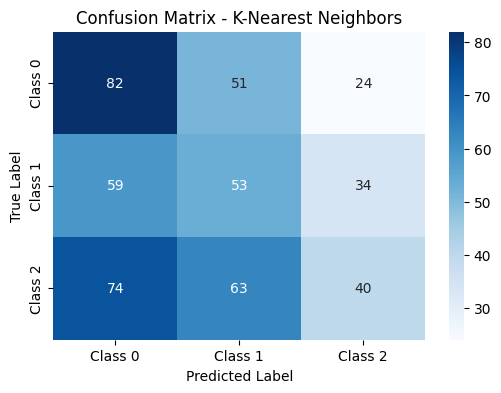

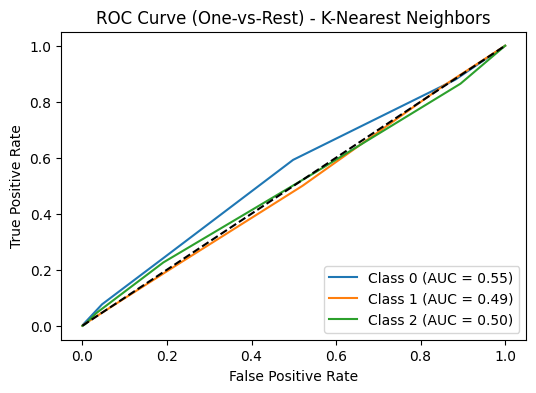

Average AUC Score (macro): 0.5135
--- Logistic Regression ---
Accuracy: 0.3250
Precision (macro): 0.3124
Recall (macro): 0.3163
F1-score (macro): 0.3095
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.28      0.22      0.25       157
     Class 1       0.29      0.25      0.27       146
     Class 2       0.37      0.49      0.42       177

    accuracy                           0.33       480
   macro avg       0.31      0.32      0.31       480
weighted avg       0.32      0.33      0.32       480



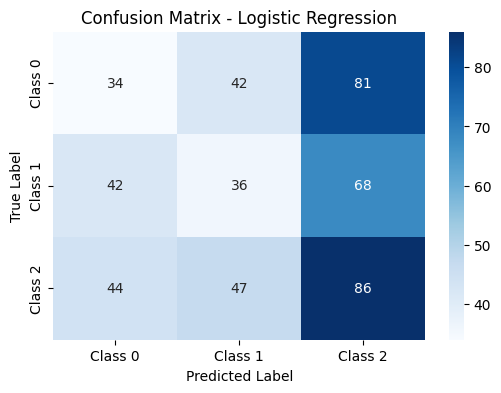

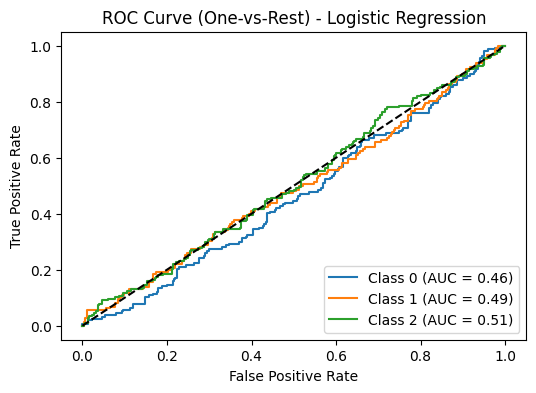

Average AUC Score (macro): 0.4856
--- Neural Network ---
Accuracy: 0.3333
Precision (macro): 0.3058
Recall (macro): 0.3367
F1-score (macro): 0.2084
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.33      0.93      0.49       157
     Class 1       0.25      0.01      0.01       146
     Class 2       0.33      0.07      0.12       177

    accuracy                           0.33       480
   macro avg       0.31      0.34      0.21       480
weighted avg       0.31      0.33      0.21       480



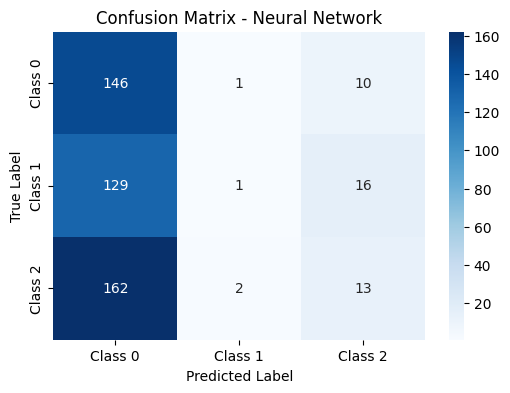

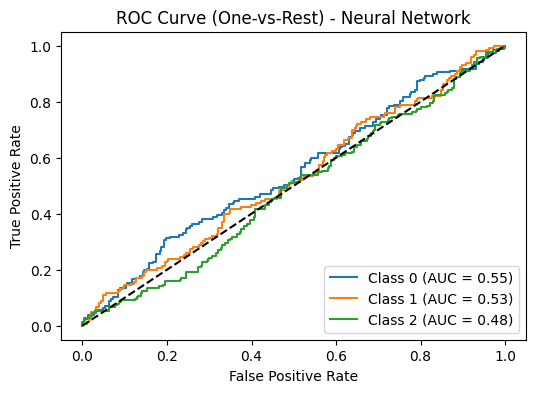

Average AUC Score (macro): 0.5186
Model Performance Summary:
                 model  accuracy  precision    recall  f1_score       auc
0  K-Nearest Neighbors  0.364583   0.368975  0.370432  0.356809  0.513541
2       Neural Network  0.333333   0.305810  0.336744  0.208429  0.518553
1  Logistic Regression  0.325000   0.312430  0.316337  0.309549  0.485553


<ipython-input-20-0b6c8a8ba226>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='accuracy', data=results_df.sort_values('accuracy', ascending=False), palette='viridis')


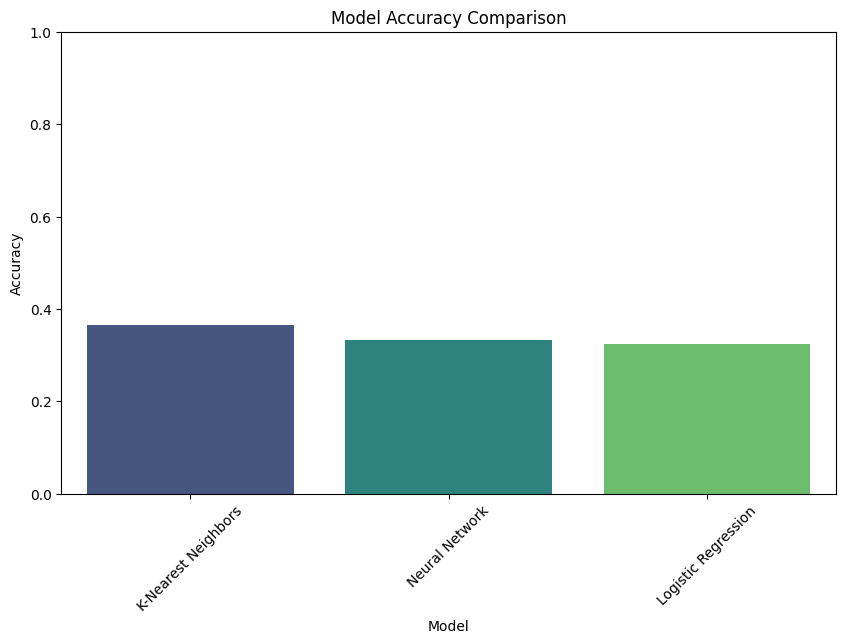

<ipython-input-20-0b6c8a8ba226>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y=metric, data=results_df.sort_values(metric, ascending=False), palette='mako')


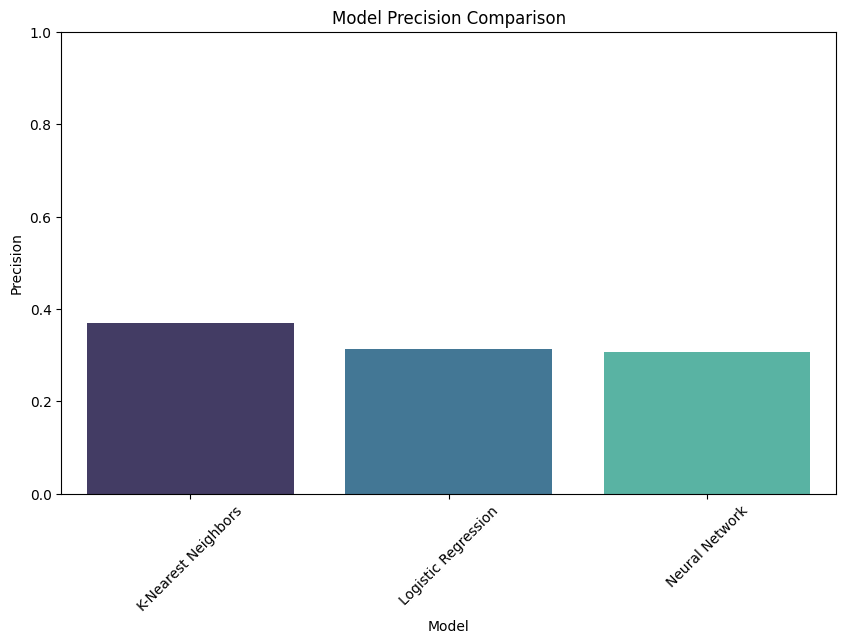

<ipython-input-20-0b6c8a8ba226>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y=metric, data=results_df.sort_values(metric, ascending=False), palette='mako')


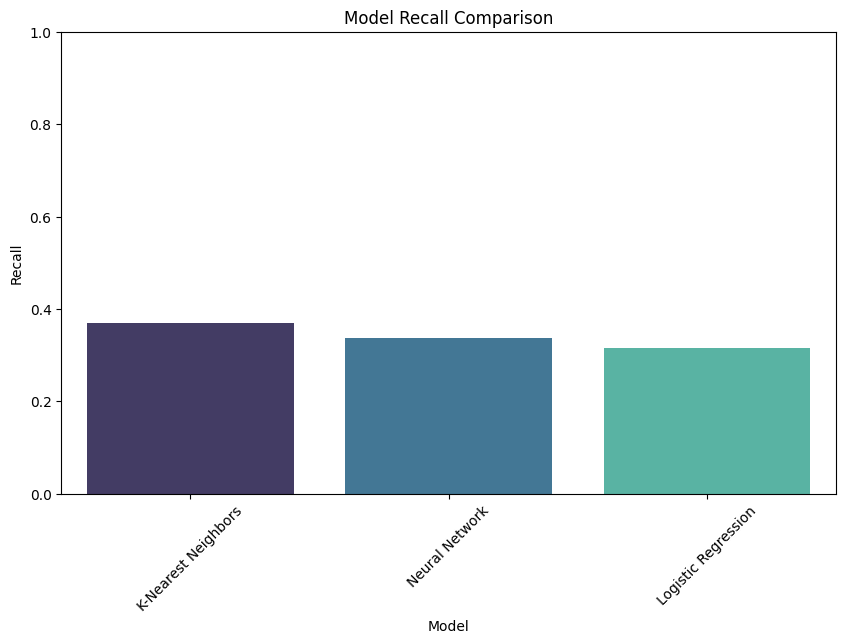

<ipython-input-20-0b6c8a8ba226>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y=metric, data=results_df.sort_values(metric, ascending=False), palette='mako')


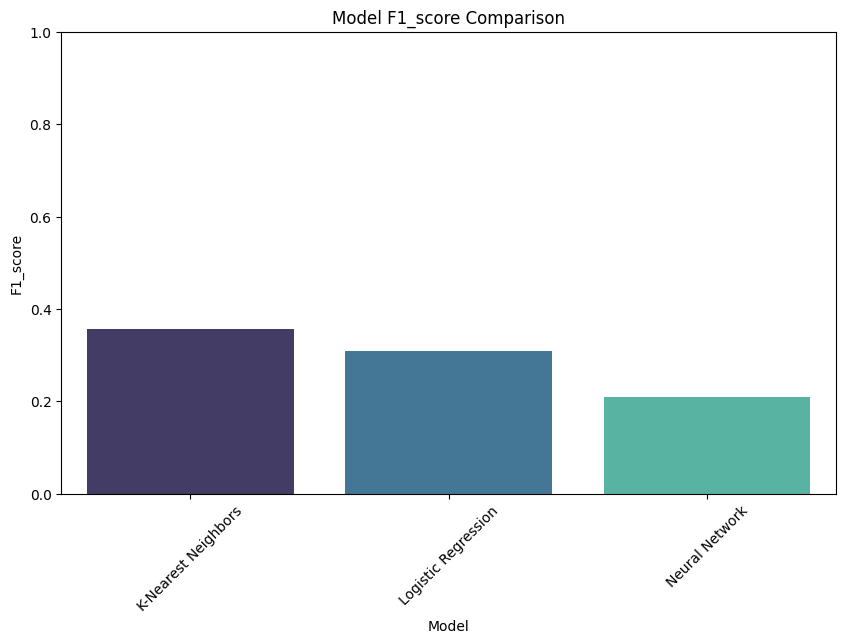

<ipython-input-20-0b6c8a8ba226>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y=metric, data=results_df.sort_values(metric, ascending=False), palette='mako')


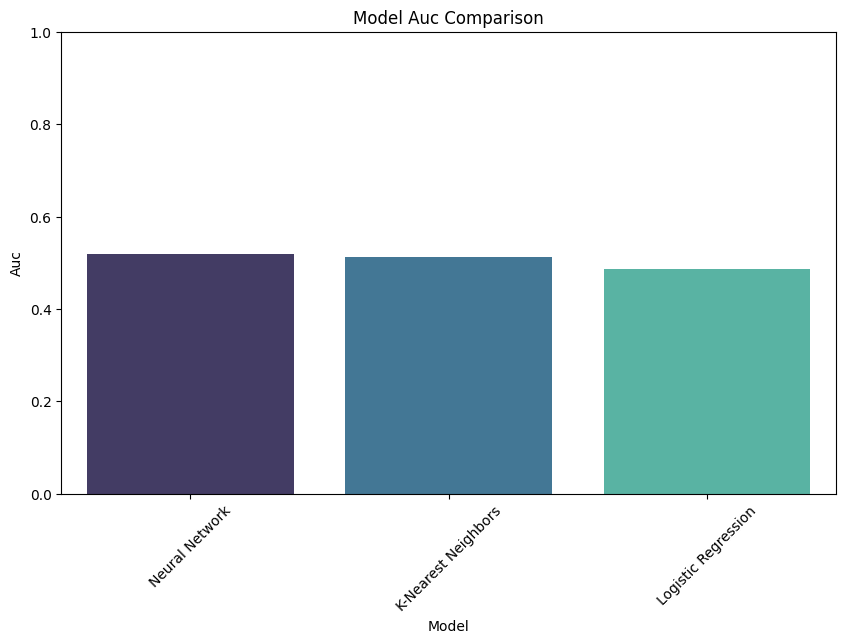

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
#Train Models
# 1. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)

# 2. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=1)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)

# 3. Neural Network
nn_model = Model()
nn_model.layers = [
    NeuronLayer(8, 64, ReLU),
    NeuronLayer(64, 64, ReLU),
    NeuronLayer(64, 3, ReLU)
]
nn_model.compile(loss=MeanSquareError, optimizer=GradientDescent, learningRate=0.01)
nn_model.fit(X_train, y_train.reshape(-1, 1), epochs=100, batchSize=32)
nn_pred_continuous = nn_model.predict(X_test)
# Apply softmax to get probabilities for multiclass
exp_scores = np.exp(nn_pred_continuous - np.max(nn_pred_continuous, axis=1, keepdims=True))
y_pred_proba_nn = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
y_pred_nn = np.argmax(y_pred_proba_nn, axis=1)

# Helper function to evaluate models (adapted for multiclass)
def evaluate_model(model_name, model, X_test, y_test, y_pred, y_pred_proba=None):
    print(f"--- {model_name} ---")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1-score (macro): {f1:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'], zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve and AUC Score (One-vs-Rest for multiclass)
    auc_scores = []
    if y_pred_proba is not None:
        plt.figure(figsize=(6,4))
        for i in range(3):  # For each class
            y_test_binary = (y_test == i).astype(int)
            fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba[:, i])
            auc_score = roc_auc_score(y_test_binary, y_pred_proba[:, i])
            auc_scores.append(auc_score)
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (One-vs-Rest) - {model_name}')
        plt.legend(loc='lower right')
        plt.show()
        avg_auc = np.mean(auc_scores)
        print(f"Average AUC Score (macro): {avg_auc:.4f}")
    else:
        avg_auc = np.nan
        print("AUC/ROC not available as probability scores were not provided.")

    return {'model': model_name, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1, 'auc': avg_auc}


model_results = []
results_knn = evaluate_model("K-Nearest Neighbors", knn_model, X_test, y_test, y_pred_knn, y_pred_proba_knn)
model_results.append(results_knn)

results_lr = evaluate_model("Logistic Regression", lr_model, X_test, y_test, y_pred_lr, y_pred_proba_lr)
model_results.append(results_lr)

results_nn = evaluate_model("Neural Network", nn_model, X_test, y_test, y_pred_nn, y_pred_proba_nn)
model_results.append(results_nn)

# Summary
results_df = pd.DataFrame(model_results)
print("Model Performance Summary:")
print(results_df.sort_values(by='recall', ascending=False))

# Bar charts
# Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', data=results_df.sort_values('accuracy', ascending=False), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.show()

# Precision, Recall, F1-score, AUC
metrics_to_plot = ['precision', 'recall', 'f1_score', 'auc']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='model', y=metric, data=results_df.sort_values(metric, ascending=False), palette='mako')
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.ylim(0, 1.0)
    plt.show()
